In [1]:
!pip3 install keras
!pip3 install tensorflow
!pip3 install keras-models

     |████████████████████████████████| 49 kB 470 kB/s 
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14347 sha256=673a956ce7e5cbf456ceff28c0577be07b70954d3a11a0274aa304f8c7b75af4
  Stored in directory: /root/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built pathlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Pima%20Indians%20Diabetes%20Database/diabetes.csv")

In [4]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


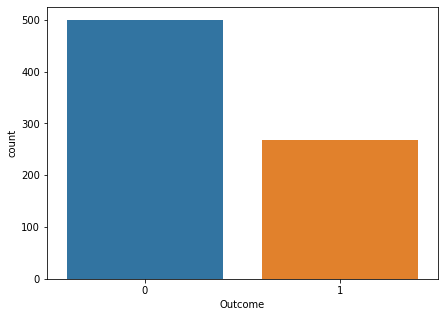

In [8]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Outcome')
plt.show()

In [9]:
data.shape

(768, 9)

In [10]:
data.isnull().values.any()

False

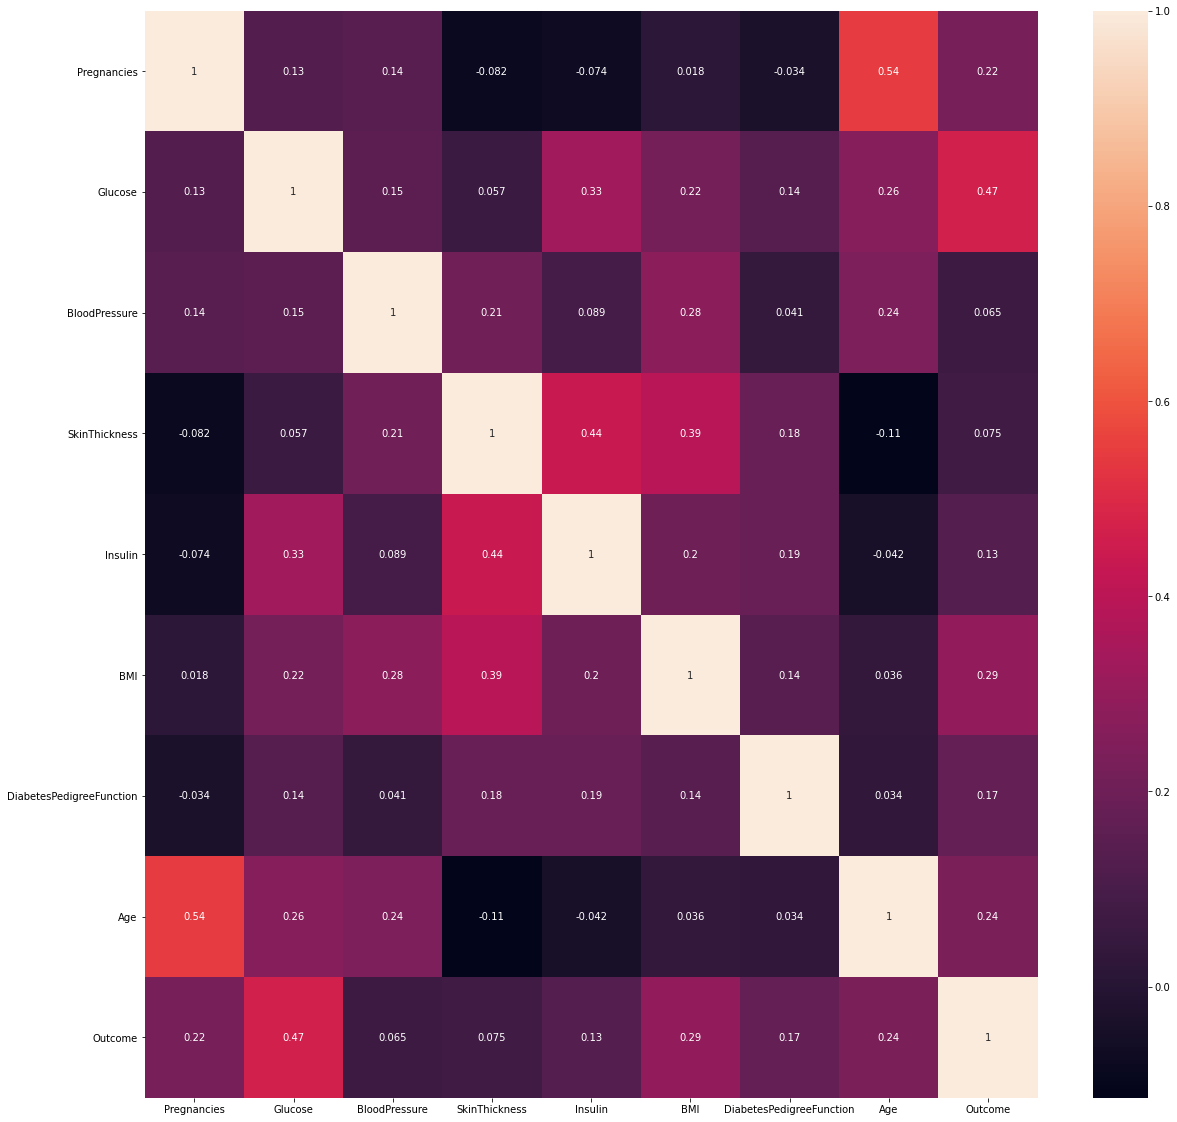

In [11]:
!pip3 install seaborn
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
Y=data["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
X=data.drop("Outcome",axis=1)
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [15]:
X=X.astype(float)
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [16]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [17]:
lst=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
for i in lst:
  tem=X[i]
  mean=X[i].mean()
  for j in range(len(tem)):
    if tem[j]==0:
      tem[j]=mean
  X.replace(i,tem,inplace=True)

  
  
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50.0
1,1.0,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31.0
2,8.0,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,5.0,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,10.0,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,8.0,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54.0


In [18]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, Y,validation_split=0.33, epochs=300)

Epoch 1/300
17/17 [==============================] - 1s 30ms/step - loss: 6.6665 - accuracy: 0.3801 - val_loss: 1.7151 - val_accuracy: 0.3543
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 1.1959 - accuracy: 0.5211 - val_loss: 0.8531 - val_accuracy: 0.5354
Epoch 3/300
17/17 [==============================] - 0s 4ms/step - loss: 0.7828 - accuracy: 0.6193 - val_loss: 0.6298 - val_accuracy: 0.6614
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 0.7358 - accuracy: 0.6259 - val_loss: 0.6834 - val_accuracy: 0.6063
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.6225 - val_loss: 0.6362 - val_accuracy: 0.6339
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.6973 - val_loss: 0.6762 - val_accuracy: 0.6772
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.9348 - accuracy: 0.6569 - val_loss: 0.7299 - val_accuracy: 0.6299
Epoch 8/300


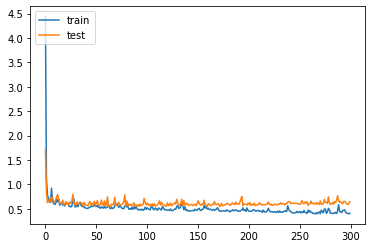

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [20]:
from sklearn import preprocessing

x = X.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_transformed = pd.DataFrame(x_scaled)
model_2 = Sequential()
model_2.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model_2.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model_2.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model_2.add(Dense(1, activation='sigmoid'))
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2=model_2.fit(x_transformed, Y,validation_split=0.33, epochs=100)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 0.6914 - accuracy: 0.5142 - val_loss: 0.6658 - val_accuracy: 0.6732
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6406 - val_loss: 0.6483 - val_accuracy: 0.6732
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6456 - val_loss: 0.6306 - val_accuracy: 0.6732
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6230 - val_loss: 0.6110 - val_accuracy: 0.6732
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.6722 - val_loss: 0.5900 - val_accuracy: 0.6850
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.6950 - val_loss: 0.5570 - val_accuracy: 0.7520
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7418 - val_loss: 0.5275 - val_accuracy: 0.7874
Epoch 8/100


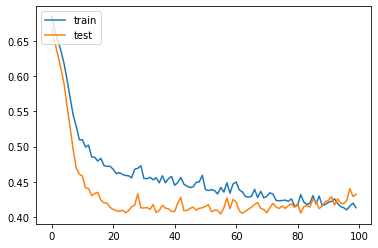

In [21]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [22]:
model_3 = Sequential()
model_3.add(Dense(64, input_dim=8, activation='relu',kernel_initializer='glorot_uniform'))
model_3.add(Dense(32,activation='relu',kernel_initializer='glorot_uniform'))
model_3.add(Dense(16,activation='relu',kernel_initializer='glorot_uniform'))
model_3.add(Dense(1, activation='sigmoid'))
# Compile model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_3=model_3.fit(x_transformed, Y,validation_split=0.33, epochs=100, batch_size=20)

Epoch 1/100
26/26 [==============================] - 1s 8ms/step - loss: 0.6783 - accuracy: 0.6458 - val_loss: 0.6574 - val_accuracy: 0.6732
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6239 - val_loss: 0.6348 - val_accuracy: 0.6732
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6441 - val_loss: 0.6053 - val_accuracy: 0.6890
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6193 - accuracy: 0.6726 - val_loss: 0.5685 - val_accuracy: 0.7165
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.6916 - val_loss: 0.5315 - val_accuracy: 0.7402
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7096 - val_loss: 0.5005 - val_accuracy: 0.7677
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7176 - val_loss: 0.4770 - val_accuracy: 0.7874
Epoch 8/100
2

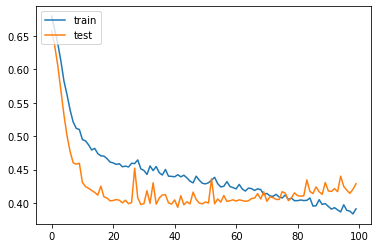

In [23]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')